# Data Science Professional Certificate Capstone

This Notebook will be used for my IBM Data Science Certificate Capstone Project.

In [2]:
import pandas as pd
import numpy as np

### Hello Capstone Project Course!

# Introduction/Business Problem

The severity of a vehicular collision often involves multiple factors. Road conditions, weather, speeding, driver inattention and intoxication are amongst the most significant contributors to an outcome involving mild, moderate and serious injury, or even fatality. Therefore, the ability to predict which combinations of factors are likely to result in injuries would be highly beneficial. If we are able to build machine learning models to assist us in this task, then we may be able to effect public policy change, and perhaps even influence citizen behaviour, in order to mitigate the devastation caused by traffic collisions.

### Stakeholders

The outcome of this research would be of value to many entities. Police expend large amounts of time, energy and resources to combat poor driving and its results. The medical community also has many of its resources consumed by caring for victims of accidents that may be preventable. Knowing where and when to focus resources to prevent collisions, or at least to mitigate their severity, would therefore be of value as a general governmental policy objective that would increase the efficiency of public spending. This knowledge would also be of direct interest to individual citizens. The situations that result in the most severe fatalities would be ones they would want to avoid. A greater knowledge of the constitutive factors of severe accidents could be used as the basis for writing and fine-tuning artificial intellgience algorithms, that could then be integrate into consumer-level GPS systems in order to provide individuals with early warnings. Consumers might them be able to adjust their driving habits so as to avoid placing themselves in high-risk collision situations in the first place.

# Data

We will be using a data set compiled by the Seattle Department of Transportation. SDOT has collected information on all collisions that have occurred in the city from 2004 to the present. It includes information on the outcomes of collisons, such as:

- The severity of the collison: whether it resulted in only property damage, injury, serious injury, or fatality;
- numbers of entities involved: for example, whether the accident involved multiple people, multiple injuries, and multiple vehicles;
- the mode of transport of the collision victims: for example, how many pedestrians were involved, the number of bicyclists, and the number of drivers;
- factors involved in the collision: for example, was inattention involved? Was a motorist speeding? Were they under the influence? Did a driver fail to give right of way to a pedestrian? Were parked vehicles hit in the collision?


### Importing the Dataset

In [3]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Let's start by dropping some columns which aren't of interest to our study

In [4]:
df.drop(["OBJECTID", "X", "Y", "COLDETKEY", "REPORTNO", "STATUS", "INCKEY", "INTKEY", "LOCATION", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "SDOT_COLCODE", "SDOT_COLDESC", "SDOTCOLNUM", "ST_COLCODE", "ST_COLDESC", "SEGLANEKEY", "CROSSWALKKEY"], axis='columns', inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [85]:
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
SEVERITYCODE.1     int64
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
INATTENTIONIND     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT      int64
SPEEDING           int64
HITPARKEDCAR       int64
dtype: object

### Cleaning the data

In [5]:
df.replace(["Y", "N", "1", "0"], [1,0,1,0], inplace=True)

In [6]:
df.fillna(0, inplace=True)


Change field types

In [7]:
df[["INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "SEVERITYCODE"]] = df[["INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "SEVERITYCODE"]].astype(int, inplace=True)

In [8]:
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,0
1,1,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,1,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,0
3,1,Block,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0
4,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,0


# Decision Tree Classifier for Predicting Accident Severity

In [1]:
from sklearn.tree import DecisionTreeClassifier

### First, let's define our independent variables, that we will use to predict accident severity.

#### For this test, we are interested in factors that are directly the result of driver behaviour. So, we have chosen:
- whether the driver was inattentive;
- if they were under the influence;
- if right of way was not granted to a predestrian when it should have been;
- if they were speeding; and
- whether they hit a parked car

In [125]:
dtdf = df[["INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "SEVERITYDESC"]]
dtdf[0:6]

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,SEVERITYDESC
0,0,0,0,0,0,Injury Collision
1,0,0,0,0,0,Property Damage Only Collision
2,0,0,0,0,0,Property Damage Only Collision
3,0,0,0,0,0,Property Damage Only Collision
4,0,0,0,0,0,Injury Collision
5,0,0,0,0,0,Property Damage Only Collision


In [126]:
dtdf.dtypes

INATTENTIONIND     int64
UNDERINFL          int64
PEDROWNOTGRNT      int64
SPEEDING           int64
HITPARKEDCAR       int64
SEVERITYDESC      object
dtype: object

In [127]:
X = dtdf[["INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
X[0:5]

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [128]:
y = dtdf["SEVERITYDESC"]
y[0:5]

0                  Injury Collision
1    Property Damage Only Collision
2    Property Damage Only Collision
3    Property Damage Only Collision
4                  Injury Collision
Name: SEVERITYDESC, dtype: object

In [139]:
dtdf.SEVERITYDESC.replace(["Injury Collision", "Property Damage Only Collision"], ["Injury", "Property Damage"], inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Setting up the Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [130]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_trainset.shape,y_testset.shape)

(136271, 5) (58402,)


### Modeling

We will first create an instance of the DecisionTreeClassifier called crashTree.
Inside of the classifier, we specify criterion="entropy" so we can see the information gain of each node.

In [131]:
crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
crashTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset.

In [132]:
crashTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [133]:
predTree = crashTree.predict(X_testset)

In [134]:
print (predTree [0:5])
print (y_testset [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
188393    Property Damage Only Collision
191329    Property Damage Only Collision
52824     Property Damage Only Collision
42414                   Injury Collision
114021    Property Damage Only Collision
Name: SEVERITYDESC, dtype: object


### Evaluation

Next, let's import metrics from sklearn and check the accuracy of our model.

In [135]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.718057600767097


### Visualization

Let's visualize the tree.

In [136]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [137]:
targetNames = dtdf["SEVERITYDESC"].unique()
print(targetNames)

['Injury Collision' 'Property Damage Only Collision']


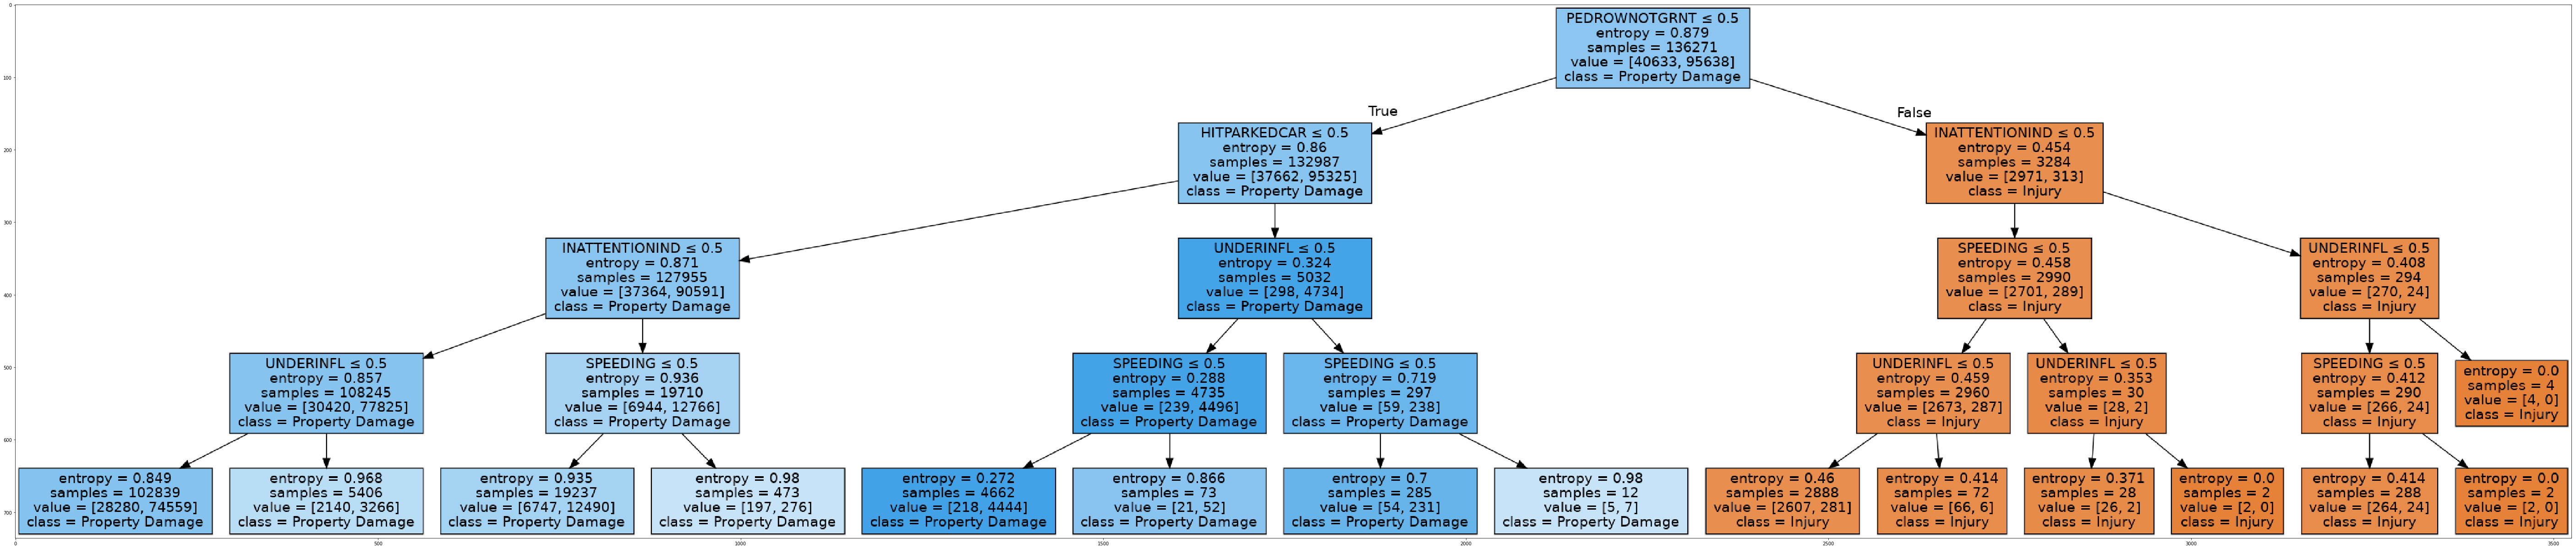

In [140]:
dot_data = StringIO()
filename = "crashtree.png"
featureNames = X.columns
targetNames = dtdf["SEVERITYDESC"].unique()
out=tree.export_graphviz(crashTree,feature_names=featureNames, class_names=targetNames, out_file=dot_data, filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Using K-Nearest Neighbour to Predict Accident Type based on Driving Conditions

### For this study, we are interested in external driving conditions. Can we find any meaningful relationships between driving conditions and the kind of accident that results?

#### We'll start by creating a new dataframe for this exercise.

In [121]:
knndf = df
knndf = knndf[['ROADCOND', 'LIGHTCOND', 'WEATHER', 'COLLISIONTYPE']]
knndf.head()

,ROADCOND,LIGHTCOND,WEATHER,COLLISIONTYPE
0,Wet,Daylight,Overcast,Angles
1,Wet,Dark - Street Lights On,Raining,Sideswipe
2,Dry,Daylight,Overcast,Parked Car
3,Dry,Daylight,Clear,Other
4,Wet,Daylight,Raining,Angles


Let's examine a few variables.

In [43]:
knndf.ROADCOND.unique()

array(['Wet', 'Dry', 0, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [24]:
knndf.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       0, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [25]:
knndf.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', 0, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [26]:
knndf.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 0, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

### Light Condition looks like the most promising, as it seems most apt for ordinal ranking.

#### However, some of these field values are not helpful for our study. Let's get rid of the unhelpful values, namely:
- 0
- 'Unknown'
- 'Other'

In [126]:
indexOther = knndf[(knndf['LIGHTCOND'] == 'Other')].index
knndf.drop(indexOther , inplace=True)

In [129]:
indexUnknown = knndf[(knndf['LIGHTCOND'] == 'Unknown')].index
knndf.drop(indexUnknown , inplace=True)

In [131]:
index0 = knndf[(knndf['LIGHTCOND'] == 0)].index
knndf.drop(index0 , inplace=True)

In [132]:
knndf.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Dark - Unknown Lighting'], dtype=object)

In [133]:
CindexOther = knndf[(knndf['COLLISIONTYPE'] == 'Other')].index
knndf.drop(CindexOther , inplace=True)
Cindex0 = knndf[(knndf['COLLISIONTYPE'] == 0)].index
knndf.drop(Cindex0 , inplace=True)

In [134]:
knndf.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Cycles', 'Rear Ended',
       'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'], dtype=object)